<a href="https://colab.research.google.com/github/lolovlad/colab/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [2]:
import pandas as pd
data = pd.read_excel("data.xlsx")
data.info(), data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

(None,
    Номер заказа  Канал продаж Продуктовый сегмент  Менеджер Название заказа  \
 0          7290  Рекомендация  Ткань и аксессуары  С. Милер        NAM SUNG   
 1          7291  Рекомендация  Ткань и аксессуары  С. Милер        CP Ткань   
 2          7436  Рекомендация  Ткань и аксессуары  С. Милер  UNIZIN COMPANY   
 
    Продавец            Город  Продажи факт, тыс.руб  Продажи план, тыс.руб  \
 0  Айсберг   Санкт-Петербург                    300                    500   
 1  Айсберг   Санкт-Петербург                    450                    500   
 2  Айсберг   Санкт-Петербург                      0                    500   
 
   Дата сделки Дата оплаты Дней между сделкой и оплатой      Статус  
 0  2020-02-03  2020-03-25                           52     Закрыто  
 1  2020-03-22  2020-04-05                           15     Закрыто  
 2  2020-03-23         NaT                               В процессе  )

In [3]:
data.columns

Index(['Номер заказа', 'Канал продаж', 'Продуктовый сегмент', 'Менеджер',
       'Название заказа', 'Продавец', 'Город', 'Продажи факт, тыс.руб',
       'Продажи план, тыс.руб', 'Дата сделки', 'Дата оплаты',
       'Дней между сделкой и оплатой', 'Статус'],
      dtype='object')

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [4]:
data = data.rename(
    columns = {
        'Номер заказа': "id",
        'Канал продаж': "sales_channel",
        'Продуктовый сегмент': "product_segment",
        'Менеджер': "manager",
        'Название заказа': "order_name",
        'Продавец': "salesman",
        'Город': "city",
        'Продажи факт, тыс.руб': "sales_fact",
        'Продажи план, тыс.руб': "sales_plan",
        'Дата сделки': "transaction_date",
        'Дата оплаты': "date_of_payment",
        'Дней между сделкой и оплатой': "days_delta",
        'Статус': "status"
    }
)

In [5]:
data["days_delta"] = pd.to_numeric(data["days_delta"], errors="coerce")

In [6]:
data["status"].unique()

array(['Закрыто', 'В процессе', 'Потерянно'], dtype=object)

In [7]:
data["order_name"].unique()

array(['NAM SUNG', 'CP Ткань', 'UNIZIN COMPANY', 'Электронные устройства',
       'USB', 'USB Beijing', 'USB Guanzhou', 'Ткань',
       'Кухонная фернитура (Concreta Cucina)',
       'Свитера мужские  (80%/20 %) GREG', 'Аппаратура', 'Winnprime',
       'Авто Гримерные', 'Униформа для прессы (China)',
       'HAINING TIANYI TEXTILE CO.,LTD', 'MATERIAL DISCOVERY CO.,LTD',
       'Ткань Taiwan JN88 /JN89 /JN90', 'JAXON Sp. z o.o.',
       'Солнечные панели', 'HANGZHOU YIDA СветING ELECTRIC CO.,LTD.',
       'NINGBO FULEDСветING CO.,LIMITED',
       '"NINGBO YOURLITE IMP AND EXP CO.,LTD',
       'PUJIANG SALE CRAFT CO.,LTD',
       'ALCOM HOLDING INTERNATIONAL CO.,LIMITED', 'Декоративные картины ',
       'Макет с динозаврами ', 'Домашний текстиль', 'LED TUBE PANСвет',
       'Неодимовые магниты ', 'Упаковка mix', 'Упаковка (China)',
       'Упаковка (Poland)', 'STARMATRIX GROUP INC.',
       'LINYI BAIXIN ENAMEL PRODUCTS CO.,LTD', 'Ткань 40HC Shanghai',
       'Ткань Taiwan 40HC', 'Pusan,

In [8]:
data["days_delta"] = data["days_delta"].fillna(0)
data["days_delta"] = data["days_delta"].astype("int")

In [26]:
end_payment_table = data.query("status not in ('В процессе', 'Потерянно')").reset_index()
end_payment = pd.pivot_table(end_payment_table, index="city", values = ["id"], aggfunc="count").reset_index().rename(columns = {"id": "count payment"})
end_payment

,city,count payment
0,Волгоград,3
1,Казань,7
2,Кемерово,1
3,Курск,1
4,Магнитогорск,9
5,Москва,13
6,Нижний Новгород,3
7,Новосибирск,9
8,Омск,1
9,Оренбург,4


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [ ]:
end_payment_table["date_of_payment"] = end_payment_table["date_of_payment"].dt.to_period("M")

In [38]:
end_payment_table["is_plan"] = end_payment_table["sales_fact"] >= end_payment_table["sales_plan"]
end_payment_table["error_plan"] = end_payment_table["sales_plan"] - end_payment_table["sales_fact"]

In [44]:
info_manager_table = pd.pivot_table(end_payment_table,
                                    index=["date_of_payment"],
                                    values=["is_plan", "error_plan"],
                                    aggfunc="mean").reset_index().sort_values(by="date_of_payment", ascending=False)

<Axes: xlabel='date_of_payment'>

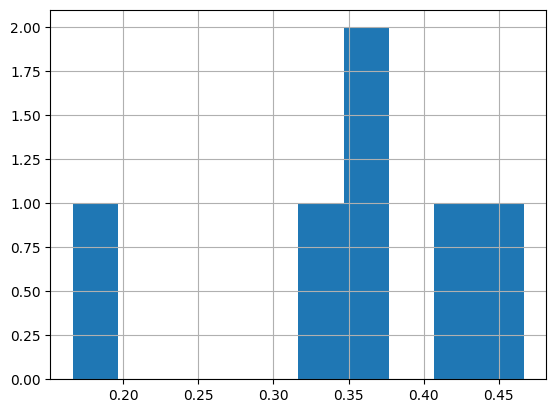

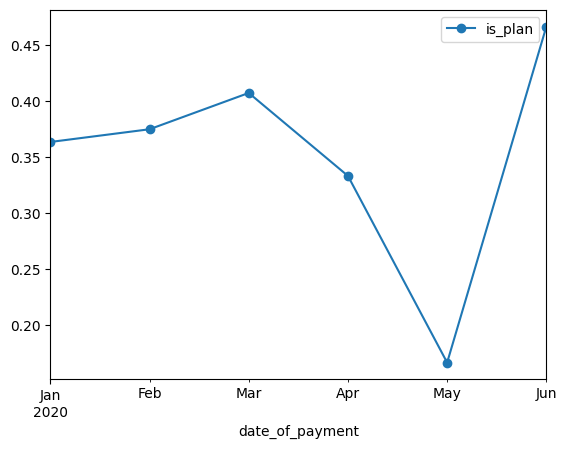

In [43]:
info_manager_table["is_plan"].hist()
info_manager_table.plot(x='date_of_payment', y='is_plan', style='o-')

In [61]:
info_manager_product_segment_table = pd.pivot_table(end_payment_table,
                                                    index=["date_of_payment"],
                                                    values=["sales_fact"],
                                                    columns=["product_segment"],
                                                    aggfunc="sum").reset_index().sort_values(by="date_of_payment", ascending=False).fillna(0)
info_manager_product_segment_table

date_of_payment   sales_fact                          \
product_segment                 Автозапчасти Бассейн  Другое Игрушки   
5                       2020-06          0.0     0.0     0.0     0.0   
4                       2020-05          0.0     0.0     0.0     0.0   
3                       2020-04          0.0     0.0  1200.0     0.0   
2                       2020-03        700.0  1500.0   250.0   250.0   
1                       2020-02          0.0     0.0  4525.0     0.0   
0                       2020-01          0.0     0.0  1250.0     0.0   

                                                                              \
product_segment Косметика Медецина Оборудование  Одежда    Свет Спорт товары   
5                     0.0      0.0      17280.0     0.0     0.0          0.0   
4                     0.0      0.0          0.0   450.0  1750.0        400.0   
3                   200.0      0.0       5055.0     0.0   700.0        350.0   
2                     0.0    400.0       5560.0   300.0  4300.0          0.0   
1                     0.0      0.0       6114.0     0.0   200.0          0.0   
0                     0.0      0.0       1090.0  3900.0     0.0          0.0   

                                                                             
product_segment Сувениры Ткань и аксессуары Упаковка Электронные устройства  
5                    0.0                0.0      0.0                    0.0  
4                    0.0              930.0    145.0                  530.0  
3                    0.0             1062.0      0.0                    0.0  
2                  230.0             2780.0     80.0                  550.0  
1                  740.0              180.0      0.0                    0.0  
0                    0.0              760.0    450.0                 1050.0

<Axes: ylabel='date_of_payment'>

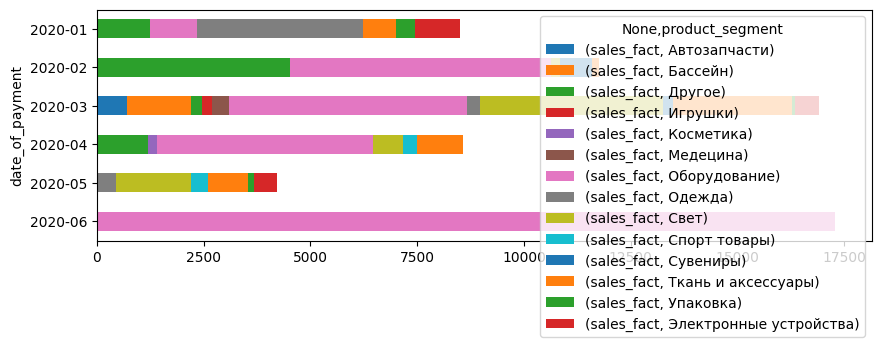

In [65]:
info_manager_product_segment_table.plot(kind='barh', x="date_of_payment", stacked=True, figsize=(10, 3))

In [80]:
info_city_table = pd.pivot_table(end_payment_table,
                                 index="city",
                                 values="sales_fact",
                                 columns="product_segment",
                                 aggfunc="sum",
                                 margins=True,
                                 fill_value=0).reset_index().drop(19).sort_values(by="All", ascending=False)
info_city_table

product_segment,city,Автозапчасти,Бассейн,Другое,Игрушки,Косметика,Медецина,Оборудование,Одежда,Свет,Спорт товары,Сувениры,Ткань и аксессуары,Упаковка,Электронные устройства,All
18,Челябинск,0,0,0,0,0,0,8700,0,0,0,0,0,0,0,8700
1,Казань,0,0,0,0,0,0,8040,0,0,0,0,0,0,0,8040
4,Магнитогорск,0,0,0,0,0,0,7580,0,0,0,0,0,0,100,7680
14,Сочи,0,0,0,0,0,0,0,0,6950,0,0,0,0,0,6950
7,Новосибирск,0,0,1125,0,200,400,3250,0,0,750,0,0,0,0,5725
11,Самара,0,0,0,0,0,0,3574,0,0,0,0,2000,0,0,5574
17,Уфа,0,0,0,0,0,0,0,4350,0,0,0,0,0,0,4350
0,Волгоград,0,0,4250,0,0,0,0,0,0,0,0,0,0,0,4250
5,Москва,0,0,0,0,0,0,500,80,0,0,0,2462,675,0,3717
9,Оренбург,0,0,0,0,0,0,1700,0,0,0,0,0,0,1050,2750


In [128]:
data_core = data.copy()
data_core.drop(["id", "product_segment", "manager", "order_name", "salesman", "city"], axis=1, inplace=True)
data_core = data_core.query("status != 'В процессе'").reset_index()

In [129]:
data_core["is_plan"] = data_core["sales_fact"] >= data_core["sales_plan"]
data_core.drop(["sales_fact", "sales_plan", "transaction_date", "date_of_payment"], axis=1, inplace=True)

In [130]:
one_hot_sales_channel = pd.get_dummies(data_core['sales_channel'])
one_hot_sales_channel.head(3)

,Вебсайт,Выставка,Контекстная реклама,Почта,Рекомендация,Холодный звонок
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0


In [131]:
one_hot_status = pd.get_dummies(data_core['status'])
one_hot_status

,Закрыто,Потерянно
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
97,0,1
98,1,0
99,1,0
100,1,0


In [132]:
data_core = data_core.join(one_hot_sales_channel)
data_core = data_core.join(one_hot_status)

In [133]:
data_core.drop(["sales_channel", "status", "index"], axis=1, inplace=True)

In [136]:
data_core = data_core.rename(
    columns = {
       "days_delta": "Дней между сделкой и оплатой",
       "is_plan": "Был ли выполнен план"
    }
)
data_core

,Дней между сделкой и оплатой,Был ли выполнен план,Вебсайт,Выставка,Контекстная реклама,Почта,Рекомендация,Холодный звонок,Закрыто,Потерянно
0,52,False,0,0,0,0,1,0,1,0
1,15,False,0,0,0,0,1,0,1,0
2,1,True,0,0,0,0,1,0,1,0
3,87,False,0,0,0,0,0,1,1,0
4,0,False,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
97,0,False,0,0,0,0,1,0,0,1
98,13,True,0,0,0,0,1,0,1,0
99,9,True,0,0,0,0,1,0,1,0
100,5,False,0,0,0,0,1,0,1,0


In [139]:
corr = data_core.corr()
corr.style.background_gradient(cmap='coolwarm')

,Дней между сделкой и оплатой,Был ли выполнен план,Вебсайт,Выставка,Контекстная реклама,Почта,Рекомендация,Холодный звонок,Закрыто,Потерянно
Дней между сделкой и оплатой,1.000000,0.177680,-0.062273,-0.294608,-0.033584,0.102610,-0.034085,0.314176,0.233340,-0.233340
Был ли выполнен план,0.177680,1.000000,-0.123091,0.031068,-0.191943,-0.035714,0.077671,0.059761,0.219971,-0.219971
Вебсайт,-0.062273,-0.123091,1.000000,-0.107079,-0.047253,-0.035169,-0.107079,-0.117698,-0.150425,0.150425
Выставка,-0.294608,0.031068,-0.107079,1.000000,-0.166975,-0.124274,-0.378378,-0.415900,0.191356,-0.191356
Контекстная реклама,-0.033584,-0.191943,-0.047253,-0.166975,1.000000,-0.054841,-0.166975,-0.183533,-0.188993,0.188993
Почта,0.102610,-0.035714,-0.035169,-0.124274,-0.054841,1.000000,-0.124274,-0.136598,-0.115223,0.115223
Рекомендация,-0.034085,0.077671,-0.107079,-0.378378,-0.166975,-0.124274,1.000000,-0.415900,-0.041005,0.041005
Холодный звонок,0.314176,0.059761,-0.117698,-0.415900,-0.183533,-0.136598,-0.415900,1.000000,0.061347,-0.061347
Закрыто,0.233340,0.219971,-0.150425,0.191356,-0.188993,-0.115223,-0.041005,0.061347,1.000000,-1.000000
Потерянно,-0.233340,-0.219971,0.150425,-0.191356,0.188993,0.115223,0.041005,-0.061347,-1.000000,1.000000


Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [180]:
sum_sales_fact = pd.pivot_table(data,
                                index="product_segment",
                                values="sales_fact").reset_index().rename(columns={"sales_fact": "sum"})
sum_sales_fact

,product_segment,sum
0,Автозапчасти,700.000000
1,Бассейн,1500.000000
2,Другое,722.500000
3,Игрушки,125.000000
4,Косметика,200.000000
5,Медецина,400.000000
6,Оборудование,763.021739
7,Одежда,775.000000
8,Охота и рыбалка,0.000000
9,Свет,579.166667


In [181]:
count_sales_fact = pd.pivot_table(data.query("status not in ('В процессе', 'Потерянно')"),
                                  index="product_segment",
                                  values="sales_fact",
                                  aggfunc="count").reset_index().rename(columns={"sales_fact": "count"})
count_sales_fact

,product_segment,count
0,Автозапчасти,1
1,Бассейн,1
2,Другое,8
3,Игрушки,1
4,Косметика,1
5,Медецина,1
6,Оборудование,36
7,Одежда,5
8,Свет,11
9,Спорт товары,2


In [182]:
result = pd.merge(count_sales_fact, sum_sales_fact, on="product_segment")
result = result.fillna(0)
result

,product_segment,count,sum
0,Автозапчасти,1,700.000000
1,Бассейн,1,1500.000000
2,Другое,8,722.500000
3,Игрушки,1,125.000000
4,Косметика,1,200.000000
5,Медецина,1,400.000000
6,Оборудование,36,763.021739
7,Одежда,5,775.000000
8,Свет,11,579.166667
9,Спорт товары,2,375.000000


from matplotlib import pyplot as plt
result['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result.plot(kind='scatter', x='count', y='sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result['sum'].plot(kind='line', figsize=(8, 4), title='sum')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
print(data["manager"].unique())
info_manager_salse = pd.pivot_table(data.query("status not in ('В процессе', 'Потерянно')"),
                                    index=["manager", "product_segment"],
                                    values="sales_fact",
                                    aggfunc="sum")
info_manager_salse

['С. Милер' 'М. Баили' 'Т. Ли' 'А. Фостер' 'Р. Хайерс' 'А. Перри']


sales_fact
manager   product_segment                   
А. Перри  Другое                         650
А. Фостер Свет                          6950
М. Баили  Автозапчасти                   700
          Бассейн                       1500
          Другое                        6575
          Оборудование                  3670
          Одежда                        4650
          Спорт товары                   750
          Сувениры                       970
          Ткань и аксессуары            3452
          Упаковка                       675
          Электронные устройства        1080
Р. Хайерс Медецина                       400
          Оборудование                 29529
С. Милер  Ткань и аксессуары            2260
Т. Ли     Игрушки                        250
          Косметика                      200
          Оборудование                  1900
          Электронные устройства        1050

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

1. Следуя из анализа можно сказать что менеджеры по разному справляються с разными категориями товаров, по этому профилирование менеджеров являеться хорошей идеей
2. Каналы связи можно не расширять, так как весьма явной кареляции не наблюдаеться. Расширять регионы есть смысл, но лучше сделать разделение регионов на типы товаров. Некоторые регионы покупали только один тип товаров.